In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/olegdubetcky/Text-Classification-with-ML-Project/main/news.csv', encoding='utf8')


In [ ]:
import requests
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import string
from nltk.corpus import stopwords

url = 'https://raw.githubusercontent.com/olegdubetcky/Ukrainian-Stopwords/main/ukrainian'
r = requests.get(url)
with open(nltk.data.path[0]+'/corpora/stopwords/ukrainian', 'wb') as f:
    f.write(r.content)
# Retrieve HTTP meta-data
print(r.status_code)
print(r.headers['content-type'])
print(r.encoding)

import string
from nltk.corpus import stopwords
stopwords = stopwords.words("ukrainian")

/usr/local/lib/python3.7/dist-packages/nltk/decorators.py:70: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  formatvalue=lambda value: "")[1:-1]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
200
text/plain; charset=utf-8
utf-8


In [ ]:
!pip install git+https://github.com/kmike/pymorphy2.git
!pip install -U pymorphy2-dicts-uk

  Cloning https://github.com/kmike/pymorphy2.git to /tmp/pip-req-build-1mq0l_cr
  Running command git clone -q https://github.com/kmike/pymorphy2.git /tmp/pip-req-build-1mq0l_cr
     |████████████████████████████████| 8.2MB 4.7MB/s 
  Created wheel for pymorphy2: filename=pymorphy2-0.9.1-cp37-none-any.whl size=55263 sha256=03f66e7e0ccd428db55775645a961dbf9b3df50586eeb73e95c8aa03e9813e50
  Stored in directory: /tmp/pip-ephem-wheel-cache-2w5ahnd0/wheels/0f/c8/2e/9d912793948be59c5fdd670697fe29a3bd1882eaa268eba90d
Successfully built pymorphy2
     |████████████████████████████████| 5.0MB 5.2MB/s 


In [ ]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer(lang='uk')

stop_words = frozenset(stopwords+list(string.punctuation)+[u'quot'])
for index, row in df.iterrows():
  sentences = nltk.sent_tokenize(row['title'].lower())
  for sentence in sentences:
    words = nltk.word_tokenize(sentence)
    without_stop_words = [word for word in words if not word in stop_words]

    normal_words=[]
    for token in without_stop_words:
      p = morph.parse(token)[0]
      normal_words.append(p.normal_form)
    n_title = ' '.join(normal_words)
    df.loc[index, 'normalized'] =n_title

/usr/local/lib/python3.7/dist-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/usr/local/lib/python3.7/dist-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/usr/local/lib/python3.7/dist-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/usr/local/lib/python3.7/dist-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.g

In [ ]:
#розділити дані на зразки для навчання та тестування
from sklearn.model_selection import train_test_split
train_docs, test_docs = train_test_split(df, stratify=df.category, test_size=50, random_state=42)

In [ ]:
train_docs.shape, test_docs.shape

((3243, 4), (50, 4))

In [ ]:
import pandas as pd
pd.Series(test_docs.category).value_counts()

Коронавірус    16
Політика        7
Події           6
Культура        5
Світ            5
Суспільство     3
Економіка       2
Думки           2
Екологія        1
Історія         1
Наука           1
Спорт           1
Name: category, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=.2, min_df=3, max_features=2000)
doc_train_matrix = vectorizer.fit_transform(train_docs['normalized'])
words = vectorizer.get_feature_names()
doc_train_matrix

<3243x1782 sparse matrix of type '<class 'numpy.float64'>'
	with 18724 stored elements in Compressed Sparse Row format>

In [ ]:
doc_test_matrix = vectorizer.transform(test_docs['normalized'])
doc_test_matrix

<50x1782 sparse matrix of type '<class 'numpy.float64'>'
	with 275 stored elements in Compressed Sparse Row format>

In [ ]:
topic_labels = ['Тема {}'.format(i) for i in range(1, 9)]


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=8, n_jobs=-1, max_iter=500,
                                learning_method='batch', evaluate_every=5,
                                verbose=1, random_state=42)
lda.fit(doc_train_matrix)

iteration: 1 of max_iter: 500
iteration: 2 of max_iter: 500
iteration: 3 of max_iter: 500
iteration: 4 of max_iter: 500
iteration: 5 of max_iter: 500, perplexity: 6471.8220
iteration: 6 of max_iter: 500
iteration: 7 of max_iter: 500
iteration: 8 of max_iter: 500
iteration: 9 of max_iter: 500
iteration: 10 of max_iter: 500, perplexity: 6007.4446
iteration: 11 of max_iter: 500
iteration: 12 of max_iter: 500
iteration: 13 of max_iter: 500
iteration: 14 of max_iter: 500
iteration: 15 of max_iter: 500, perplexity: 5888.2422
iteration: 16 of max_iter: 500
iteration: 17 of max_iter: 500
iteration: 18 of max_iter: 500
iteration: 19 of max_iter: 500
iteration: 20 of max_iter: 500, perplexity: 5850.9857
iteration: 21 of max_iter: 500
iteration: 22 of max_iter: 500
iteration: 23 of max_iter: 500
iteration: 24 of max_iter: 500
iteration: 25 of max_iter: 500, perplexity: 5829.4183
iteration: 26 of max_iter: 500
iteration: 27 of max_iter: 500
iteration: 28 of max_iter: 500
iteration: 29 of max_iter:

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=5, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=500,
                          mean_change_tol=0.001, n_components=8, n_jobs=-1,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=1)

In [ ]:
from sklearn.externals import joblib
joblib.dump(lda, 'lda_500_iter.pkl')
lda = joblib.load('lda_500_iter.pkl')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Досліджуйте теми та розподіл слів
topics_count = lda.components_
print(topics_count.shape)
topics_count[:8]

(8, 1782)


array([[2.54478474, 0.12515864, 0.12503298, ..., 1.79495008, 2.36174537,
        0.12500011],
       [6.58720384, 0.12512972, 8.32543779, ..., 0.53697581, 0.1250169 ,
        0.1250001 ],
       [2.26538587, 0.12509201, 0.12504808, ..., 0.1250621 , 1.16641673,
        0.1250001 ],
       ...,
       [0.96365353, 2.33003762, 0.12543425, ..., 3.26163151, 0.48821581,
        0.71614713],
       [1.4298274 , 1.26636747, 0.12514188, ..., 0.12500022, 0.12500024,
        1.10339861],
       [0.53718903, 0.1250002 , 0.12501444, ..., 0.55738965, 0.61972169,
        0.12500013]])

In [ ]:
topics_prob = topics_count / topics_count.sum(axis=1).reshape(-1, 1)
topics = pd.DataFrame(topics_prob.T,
                      index=words,
                      columns=topic_labels)
topics.head()

,Тема 1,Тема 2,Тема 3,Тема 4,Тема 5,Тема 6,Тема 7,Тема 8
10,0.002149,0.004953,0.001668,0.000113,0.000123,0.000806,0.001282,0.000534
100,0.000106,0.000094,0.000092,0.001557,0.001646,0.001948,0.001136,0.000124
11,0.000106,0.006260,0.000092,0.000113,0.000123,0.000105,0.000112,0.000124
12,0.000106,0.004576,0.000353,0.000113,0.000563,0.000105,0.000112,0.000915
120,0.001270,0.000094,0.000092,0.000113,0.000123,0.000106,0.000112,0.000125


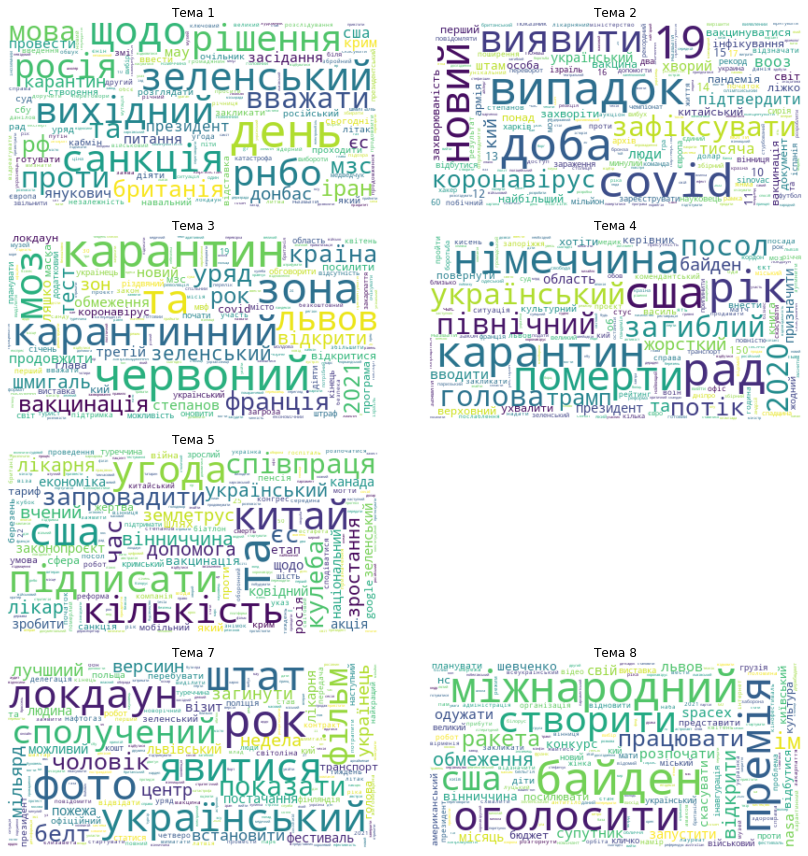

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
w = WordCloud(background_color='white',max_font_size = 50)
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(12, 12))
axes = axes.flatten()
for t, (topic, freq) in enumerate(topics.items()):
    w.generate_from_frequencies(freq.to_dict())
    axes[t].imshow(w, interpolation='bilinear')
    axes[t].set_title(topic, fontsize=12)
    axes[t].axis('off')
axes[5].set_visible(False)
plt.tight_layout()

In [ ]:
# всі слова мають позитивну ймовірність для всіх тем
topics[topics.gt(0).all(1)].shape[0] == topics.shape[0]

True

In [ ]:
n_words = 12
top_words = {}
for topic, words_ in topics.items():
    top_words[topic] = words_.nlargest(n_words).index.tolist()
pd.DataFrame(top_words)

,Тема 1,Тема 2,Тема 3,Тема 4,Тема 5,Тема 6,Тема 7,Тема 8
0,день,випадок,карантин,рад,та,вакцина,рок,байден
1,щодо,доба,червоний,сша,сша,covid,фото,міжнародний
2,зеленський,19,зона,карантин,китай,19,штат,премія
3,санкція,covid,та,рік,підписати,щеплення,український,оголосити
4,рнбо,новий,карантинний,німеччина,угода,отримати,локдаун,створити
5,вихідний,виявити,моз,померти,кількість,мільйон,явитися,сша
6,рішення,зафіксувати,львов,український,співпраця,вакцинація,сполучений,працювати
7,росія,коронавірус,франція,2020,запровадити,світ,фільм,ім
8,проти,кий,уряд,загиблий,єс,доза,показати,ракета
9,вважати,вооз,країна,північний,кулеба,понад,чоловік,обмеження


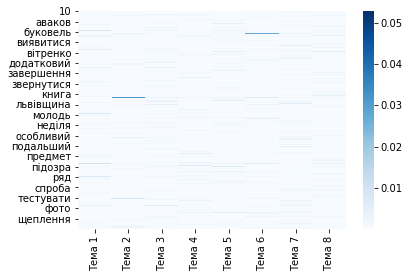

In [ ]:
import seaborn as sns
sns.heatmap(topics, cmap='Blues')

In [ ]:
train_preds = lda.transform(doc_train_matrix)
train_preds.shape

(3243, 8)

In [ ]:
train_eval = pd.DataFrame(train_preds, columns=topic_labels, index=train_docs.category)
train_eval.head()

,Тема 1,Тема 2,Тема 3,Тема 4,Тема 5,Тема 6,Тема 7,Тема 8
category,,,,,,,,
Світ,0.034440,0.759034,0.034436,0.034407,0.034437,0.034454,0.034394,0.034398
Коронавірус,0.046035,0.046021,0.677725,0.046089,0.046033,0.046018,0.046062,0.046018
Коронавірус,0.031197,0.270667,0.031025,0.031021,0.031390,0.031161,0.031017,0.542523
Події,0.757323,0.034664,0.034668,0.034665,0.034673,0.034664,0.034678,0.034664
Транспорт,0.042429,0.702501,0.042416,0.042466,0.042418,0.042804,0.042394,0.042573


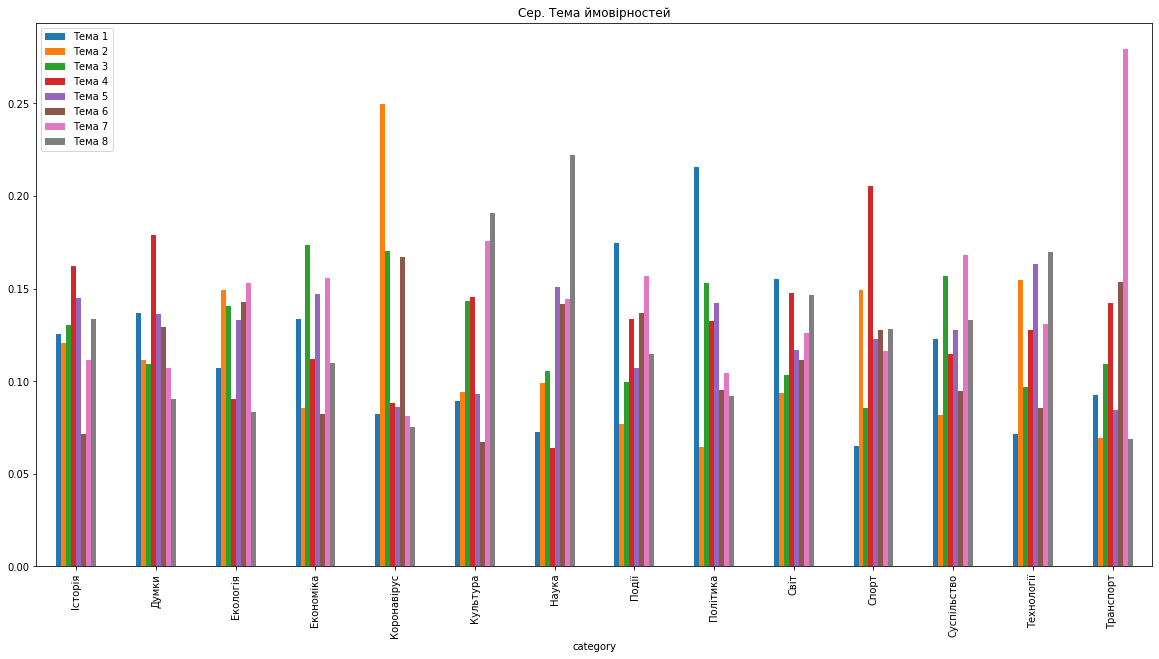

In [ ]:
train_eval.groupby(level='category').mean().plot.bar(title='Сер. Тема ймовірностей', figsize=(20,10));

Text(0.5, 1.0, 'Дані навчання: Тематичні завдання')

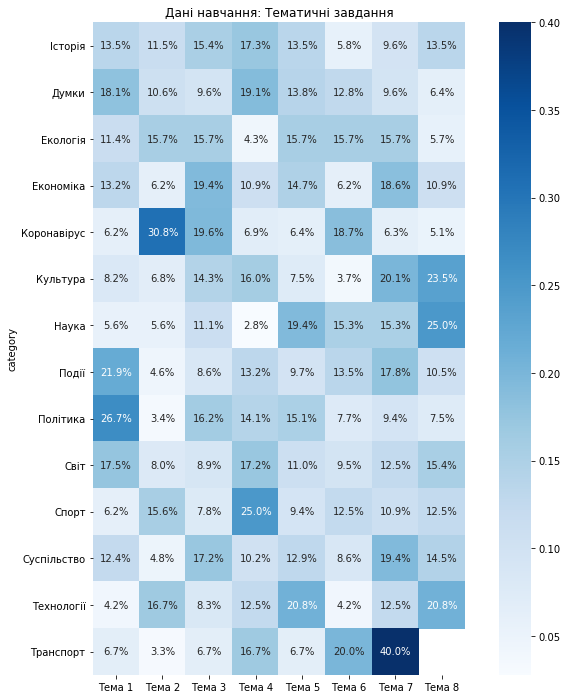

In [ ]:
df = train_eval.groupby(level='category').idxmax(
    axis=1).reset_index(-1, drop=True)
plt.figure(figsize=(12, 12))
sns.heatmap(df.groupby(level='category').value_counts(normalize=True)
            .unstack(-1), annot=True, fmt='.1%', cmap='Blues', square=True)
plt.title('Дані навчання: Тематичні завдання')



In [ ]:
train_eval = pd.DataFrame(data=lda.transform(doc_train_matrix),
                          columns=topic_labels,
                          index=train_docs.category)
test_eval = pd.DataFrame(data=lda.transform(doc_test_matrix),
                         columns=topic_labels,
                         index=test_docs.category)

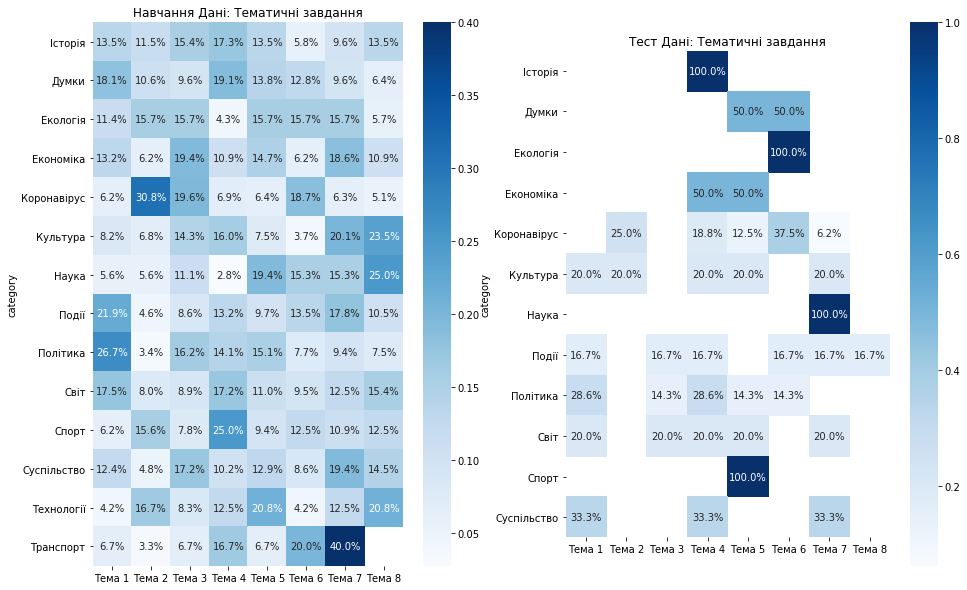

In [ ]:
import seaborn as sns

fig, axes = plt.subplots(ncols=2, figsize=(16,10))
source = ['Навчання', 'Тест']
for i, df in enumerate([train_eval, test_eval]):
    df = df.groupby(level='category').idxmax(
    axis=1).reset_index(-1, drop=True)
    sns.heatmap(df.groupby(level='category').value_counts(normalize=True)
            .unstack(-1), annot=True, fmt='.1%', cmap='Blues', square=True, ax=axes[i])
    axes[i].set_title('{} Дані: Тематичні завдання'.format(source[i]));

In [ ]:
#Перегляньте неправильно класифіковані статті
test_assignments = test_eval.groupby(level='category').idxmax(
    axis=1).reset_index(-1, drop=True).to_frame('predicted').reset_index()
test_assignments['title'] = test_docs.title.values
test_assignments.head()

,category,predicted,title
0,Історія,Тема 4,Байден прокоментував голосування у справі про ...
1,Думки,Тема 6,Україна безкоштовно отримає 16 мільйонів доз в...
2,Думки,Тема 5,"Україна розпочне щеплення вакцииною Pfizer, на..."
3,Екологія,Тема 6,На Львівщині впроваджують проєкт з аеромедично...
4,Економіка,Тема 4,Колишнього голову правління &quot;ПриватБанку&...


In [ ]:
misclassified = test_assignments[(test_assignments.category == 'Політика') & (
    test_assignments.predicted == 'Тема 1')]
misclassified.title

38        Головна ялинка Харкова засяє як Ейфелева вежа
40    Проведення Олімпійських ігор дасть світові над...
Name: title, dtype: object

In [ ]:
misclassified.title.tolist()

['Головна ялинка Харкова засяє як Ейфелева вежа',
 "Проведення Олімпійських ігор дасть світові надію, - прем'єр Японії"]

In [ ]:
!pip install pyLDAvis
import pyLDAvis.sklearn


In [ ]:
lda_viz = pyLDAvis.sklearn.prepare(lda, doc_train_matrix, vectorizer, mds='tsne')
pyLDAvis.display(lda_viz)